#🖼️✨ **Image Encoding with Pretrained CNN (ResNet)**
In this notebook, I demonstrate how to preprocess images and extract feature embeddings using a pretrained ResNet model from torchvision.

##🎯 **Task Objective**
- Load and preprocess an input image.

- Pass the image through a pretrained CNN (ResNet-50).

- Extract the final feature embedding vector representing the image.

- Compare embeddings of two images using cosine similarity.

##📦 **Import Libraries**

In [5]:
import torch
import torch.nn.functional as F
from torchvision import models, transforms
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

##🧰 **Load Pretrained ResNet Model**

In [6]:
# Load pretrained ResNet-50
resnet = models.resnet50(pretrained=True)
resnet.eval()  # set to evaluation mode

# Remove the final classification layer to get feature vectors
feature_extractor = torch.nn.Sequential(*list(resnet.children())[:-1])

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 138MB/s]


##🧪 **Load and Preprocess Image**

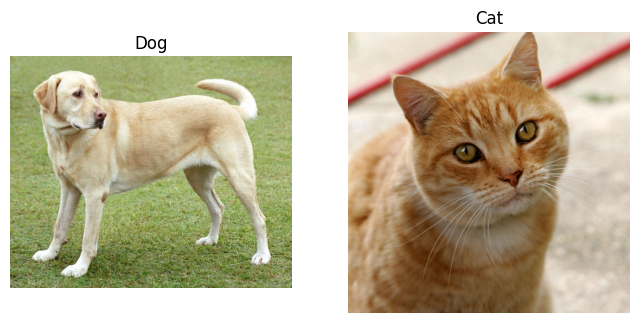

In [7]:
# URLs of images

dog_img_url="https://upload.wikimedia.org/wikipedia/commons/2/26/YellowLabradorLooking_new.jpg"
cat_img_url="https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg"


dog_img = image = Image.open(requests.get(dog_img_url, stream=True).raw).convert("RGB")

cat_img = Image.open(requests.get(cat_img_url, stream=True).raw).convert("RGB")

# Display images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first image
plt.imshow(dog_img)
plt.axis('off')
plt.title('Dog')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second image
plt.imshow(cat_img)
plt.axis('off')
plt.title('Cat')

plt.show()

In [8]:

# Preprocessing pipeline (matches ResNet training)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225])
])




In [9]:
input_tensor = preprocess(dog_img).unsqueeze(0)  # batch dimension
with torch.no_grad():
    features = feature_extractor(input_tensor)

# Flatten the output tensor to a vector
embedding = features.squeeze().flatten()
print("Image embedding shape:", embedding.shape)
print("Sample embedding values (first 10):", embedding[:10])


Image embedding shape: torch.Size([2048])
Sample embedding values (first 10): tensor([0.0806, 0.6900, 0.6388, 0.1842, 0.2921, 0.2202, 0.6957, 1.0433, 0.3735,
        0.3175])


##📏 **Compare Two Images by Similarity**

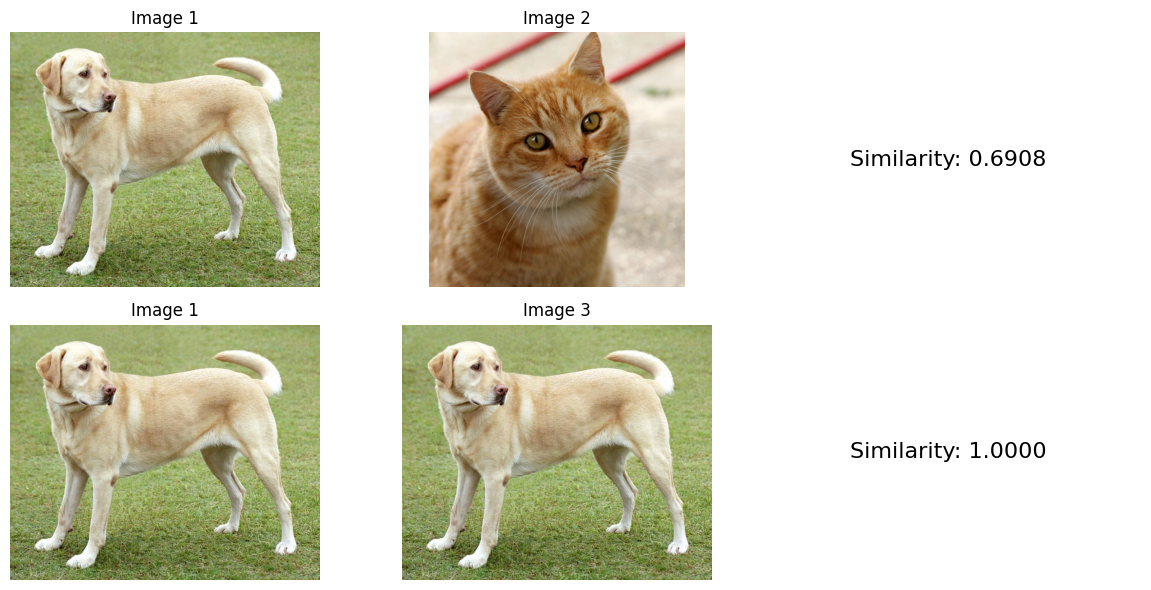

In [10]:
def get_embedding_from_pil(img):
    input_tensor = preprocess(img).unsqueeze(0)  # add batch dim
    with torch.no_grad():
        features = feature_extractor(input_tensor)
    embedding = features.squeeze().flatten()
    return F.normalize(embedding, p=2, dim=0)

# Your list of images to compare
image_list = [dog_img, cat_img, dog_img]

# Compute embeddings for all images in the list
embeddings = [get_embedding_from_pil(img) for img in image_list]

pairs = [(0, 1), (0, 2)]  # image indices to compare

plt.figure(figsize=(12, 6))

for idx, (i, j) in enumerate(pairs, 1):
    sim = F.cosine_similarity(embeddings[i].unsqueeze(0), embeddings[j].unsqueeze(0)).item()

    plt.subplot(len(pairs), 3, 3*idx - 2)
    plt.imshow(image_list[i])
    plt.axis('off')
    plt.title(f"Image {i+1}")

    plt.subplot(len(pairs), 3, 3*idx - 1)
    plt.imshow(image_list[j])
    plt.axis('off')
    plt.title(f"Image {j+1}")

    plt.subplot(len(pairs), 3, 3*idx)
    plt.axis('off')
    plt.text(0.5, 0.5, f"Similarity: {sim:.4f}", fontsize=16, ha='center', va='center')

plt.tight_layout()
plt.show()


##📝 **Summary**
In this notebook, I:

- **Preprocessed images** for input into a pretrained ResNet model.

- **Extracted feature embeddings** representing high-level image features.

- **Compared embeddings** using cosine similarity to evaluate visual similarity.

This highlighted how **image encoding** transforms visual data into numerical vectors, enabling tasks such as similarity search, classification, and clustering by making images machine-readable.